In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [7]:
glass_data = pd.read_csv('glass.csv')

# Glass data
glass_data.info()
print("--"*20)
glass_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB
----------------------------------------


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [8]:
glass_data.values[50:60, :]

array([[52.     ,  1.51926, 13.2    ,  3.33   ,  1.28   , 72.36   ,
         0.6    ,  9.14   ,  0.     ,  0.11   ,  1.     ],
       [53.     ,  1.51808, 13.43   ,  2.87   ,  1.19   , 72.84   ,
         0.55   ,  9.03   ,  0.     ,  0.     ,  1.     ],
       [54.     ,  1.51837, 13.14   ,  2.84   ,  1.28   , 72.85   ,
         0.55   ,  9.07   ,  0.     ,  0.     ,  1.     ],
       [55.     ,  1.51778, 13.21   ,  2.81   ,  1.29   , 72.98   ,
         0.51   ,  9.02   ,  0.     ,  0.09   ,  1.     ],
       [56.     ,  1.51769, 12.45   ,  2.71   ,  1.29   , 73.7    ,
         0.56   ,  9.06   ,  0.     ,  0.24   ,  1.     ],
       [57.     ,  1.51215, 12.99   ,  3.47   ,  1.12   , 72.98   ,
         0.62   ,  8.35   ,  0.     ,  0.31   ,  1.     ],
       [58.     ,  1.51824, 12.87   ,  3.48   ,  1.29   , 72.95   ,
         0.6    ,  8.43   ,  0.     ,  0.     ,  1.     ],
       [59.     ,  1.51754, 13.48   ,  3.74   ,  1.17   , 72.99   ,
         0.59   ,  8.03   ,  0.     ,  0.  

Exploring Data

In [10]:
glass_data['1.1'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: 1.1, dtype: int64

<Figure size 720x432 with 0 Axes>

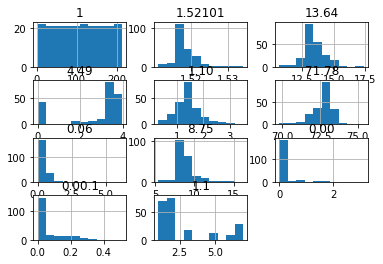

In [11]:
plt.figure(figsize=(10,6))
glass_data.hist()
plt.show()

In [12]:
target = glass_data.values[:, -1]
counter = Counter(target)

for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.2f%%' % (k,v,per))

Class=1, Count=69, Percentage=32.39%
Class=2, Count=76, Percentage=35.68%
Class=3, Count=17, Percentage=7.98%
Class=5, Count=13, Percentage=6.10%
Class=6, Count=9, Percentage=4.23%
Class=7, Count=29, Percentage=13.62%


Model Bulding

In [13]:
def load_dataset(file_path):
    df = pd.read_csv(file_path, header=0)
    
    data = df.values
    #Split data into input and output
    X, y = data[:, :-1], data[:, -1]
    # Encode the label data
    y = LabelEncoder().fit_transform(y)
    
    return X, y
    
# Evaluate the model
def evaluate_model(X, y, model):
    K = 5
    R = 3
    # K-Fold on the data
    cv = RepeatedStratifiedKFold(n_splits=K, n_repeats=R, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores

def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVC')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    
    return models, names

>SVC 0.970 (0.033)
>KNN 0.978 (0.023)
>BAG 0.983 (0.013)
>RF 0.975 (0.026)
>ET 0.978 (0.025)


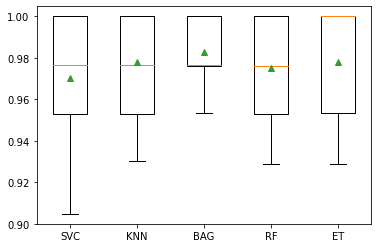

In [14]:
file_path = 'glass.csv'

X, y = load_dataset(file_path)

models, names = get_models()

results = list()

for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

RandomForestClassifier

In [15]:
class_weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}

rf_model = RandomForestClassifier(n_estimators=1000, class_weight=class_weights)

et_model = ExtraTreesClassifier(n_estimators=1000, class_weight=class_weights)

#Evaluate model
scores = evaluate_model(X, y, rf_model)
et_score = evaluate_model(X, y, et_model)

print("RF Mean Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))
print("ET Mean Accuracy: %.3f (%.3f)" % (np.mean(et_score), np.std(et_score)))

RF Mean Accuracy: 0.975 (0.025)
ET Mean Accuracy: 0.976 (0.027)


Making Predictions

In [18]:
rf_model.fit(X, y)

row = [ 1.51926 , 13.2 , 3.33, 1.28 , 72.36, 0.6 ,9.14 ,  0.0 ,  0.11  ]

print('>Predicted=%d (expected 0)' % (rf_model.predict([row])))
>Predicted=0 (expected 0)

SyntaxError: invalid syntax (2472496920.py, line 6)